# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. Please, load the csv as a pandas dataframe named `salaries` from the data folder of this repository (`Current_Employee_Names__Salaries__and_Position_Titles.csv`).

In [2]:
# Your code here:
salaries=pd.read_csv("../data/Current_Employee_Names__Salaries__and_Position_Titles.csv")


Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here:

salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
# Your code here:

salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               33183 non-null  object 
 1   Job Titles         33183 non-null  object 
 2   Department         33183 non-null  object 
 3   Full or Part-Time  33183 non-null  object 
 4   Salary or Hourly   33183 non-null  object 
 5   Typical Hours      8022 non-null   float64
 6   Annual Salary      25161 non-null  float64
 7   Hourly Rate        8022 non-null   float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB


In [5]:
salaries.isna().sum()

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [6]:
# Your code here:

salaries["Salary or Hourly"].value_counts()

Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [7]:
# Your code here:

salaries["Department"].value_counts()

POLICE                   13414
FIRE                      4641
STREETS & SAN             2198
OEMC                      2102
WATER MGMNT               1879
AVIATION                  1629
TRANSPORTN                1140
PUBLIC LIBRARY            1015
GENERAL SERVICES           980
FAMILY & SUPPORT           615
FINANCE                    560
HEALTH                     488
CITY COUNCIL               411
LAW                        407
BUILDINGS                  269
COMMUNITY DEVELOPMENT      207
BUSINESS AFFAIRS           171
COPA                       116
BOARD OF ELECTION          107
DoIT                        99
PROCUREMENT                 92
INSPECTOR GEN               87
MAYOR'S OFFICE              85
CITY CLERK                  84
ANIMAL CONTRL               81
HUMAN RESOURCES             79
CULTURAL AFFAIRS            65
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                28
TREASURER                   22
HUMAN RELATIONS             16
BOARD OF

In [8]:
salaries.groupby(["Department"])["Name"].count()

Department
ADMIN HEARNG                39
ANIMAL CONTRL               81
AVIATION                  1629
BOARD OF ELECTION          107
BOARD OF ETHICS              8
BUDGET & MGMT               46
BUILDINGS                  269
BUSINESS AFFAIRS           171
CITY CLERK                  84
CITY COUNCIL               411
COMMUNITY DEVELOPMENT      207
COPA                       116
CULTURAL AFFAIRS            65
DISABILITIES                28
DoIT                        99
FAMILY & SUPPORT           615
FINANCE                    560
FIRE                      4641
GENERAL SERVICES           980
HEALTH                     488
HUMAN RELATIONS             16
HUMAN RESOURCES             79
INSPECTOR GEN               87
LAW                        407
LICENSE APPL COMM            1
MAYOR'S OFFICE              85
OEMC                      2102
POLICE                   13414
POLICE BOARD                 2
PROCUREMENT                 92
PUBLIC LIBRARY            1015
STREETS & SAN             21

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [9]:
salaries["Hourly Rate"].head()

0      NaN
1      NaN
2      NaN
3      NaN
4    19.86
Name: Hourly Rate, dtype: float64

In [10]:
# Your code here:
# H0 : hourly wage of all hourly workers is = $30/h
# H1 : hourly wage of all hourly workers is != $30/h

#we have one group to test, all the public workers in the city:
from scipy.stats import ttest_1samp
#?ttest_1samp
#ttest_1samp(a, popmean, axis=0, nan_policy='propagate')
#Calculate the T-test for the mean of ONE group of scores.
#This is a two-sided test for the null hypothesis that the expected value
#(mean) of a sample of independent observations `a` is equal to the given
#population mean, `popmean`.
#a:sample_observation
#popmean: Expected value in null hypothesis
ttest_1samp(salaries["Hourly Rate"], 30,nan_policy="omit")

Ttest_1sampResult(statistic=20.619805785494147, pvalue=4.323024048614701e-92)

In [11]:
#p value is lower than 0.05, so we can reject the null hypothesis and state that not all workers are paid $30/h

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [12]:

#for a one tail test:
# H0 :annual salary of police workers is = $86000/year
# H1 :annual salary of police workers is >$86000/year #we do a one-sided test. alternative{‘greater’}

salaries_police=salaries.loc[salaries['Department'] == "POLICE"]
salaries_police.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
9,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
11,"ABDALLAH, ZAID",POLICE OFFICER,POLICE,F,Salary,NaN,84054.0,NaN
12,"ABDELHADI, ABDALMAHD",POLICE OFFICER,POLICE,F,Salary,NaN,87006.0,NaN


In [13]:
x=ttest_1samp(salaries_police["Annual Salary"], 86000,nan_policy="omit")
p_one_sided=x[1]/2
#we reject the null hypothesis as the probability that the annual salaries of police workers is 86000 is 0.1%

In [14]:
salaries_police["Annual Salary"].mode()

0    90024.0
dtype: float64

In [15]:
salaries_police["Annual Salary"].mean()

86486.41450313339

<AxesSubplot:>

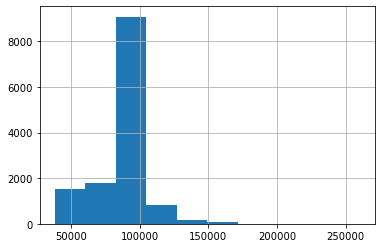

In [16]:
salaries_police["Annual Salary"].hist()

Using the `crosstab` function, find the department that has the most hourly workers. 

In [17]:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


In [18]:
# Your code here:

#pandas.crosstab(index, columns, values=None, rownames=None,
#colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)

pd.crosstab(salaries["Department"],salaries["Salary or Hourly"]).sort_values("Hourly",ascending=False)

Salary or Hourly,Hourly,Salary
Department,,
STREETS & SAN,1862,336
WATER MGMNT,1513,366
OEMC,1273,829
AVIATION,1082,547
GENERAL SERVICES,765,215
TRANSPORTN,725,415
PUBLIC LIBRARY,299,716
FAMILY & SUPPORT,287,328
CITY COUNCIL,64,347


In [19]:
# STREETS & SAN is the department with more hourly workers.

The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [20]:
#one sided test:
    
#H0: STREETS & SAN workers earn $35/h
#H0: STREETS & SAN workers earn < $35/h
 
salaries_street_san=salaries.loc[salaries['Department'] == "STREETS & SAN"]
salaries_street_san.head()


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
21,"ABDUL-SHAKUR, TAHIR",GENERAL LABORER - DSS,STREETS & SAN,F,Hourly,40.0,NaN,21.43
24,"ABERCROMBIE, TIMOTHY",MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
36,"ABRAMS, DANIELLE T",SANITATION LABORER,STREETS & SAN,F,Hourly,40.0,NaN,36.21
39,"ABRAMS, SAMUEL A",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60


In [21]:
salaries_street_san["Hourly Rate"].mean()

33.728378088076845

In [22]:
salaries_street_san.mean()

Typical Hours       37.137487
Annual Salary    83019.250000
Hourly Rate         33.728378
dtype: float64

In [23]:
len(salaries_street_san)

2198

In [33]:
#H0=street and sanitation has a hourly wage equal to $35/h
x=ttest_1samp(salaries_street_san["Hourly Rate"], 35,nan_policy="omit")
x

Ttest_1sampResult(statistic=-9.567447887848152, pvalue=3.3378530564710738e-21)

In [27]:
one_sided_p=x[1]/2
one_sided_p

1.6689265282355369e-21

In [34]:
print("p value is", one_sided_p ," lower than 0.5 (1-0.95), so we can reject H0 with a confidence above 0.95. The statistic (-9.56) show us that their hourly rate is way bellow $35/h.") 

p value is 1.6689265282355369e-21  lower than 0.5 (1-0.95), so we can reject H0 with a confidence above 0.95. The statistic (-9.56) show us that their hourly rate is way bellow $35/h.


# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [35]:

salaries_street_san.isna().sum()

Name                    0
Job Titles              0
Department              0
Full or Part-Time       0
Salary or Hourly        0
Typical Hours         336
Annual Salary        1862
Hourly Rate           336
dtype: int64

In [36]:
# Your code here:
from scipy.stats import t
#st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)) 
# scipy.stats.t(*args, **kwds) = <scipy.stats._continuous_distns.t_gen object>[source]¶


t.interval(0.95,len(salaries['Hourly Rate'])-1,loc=np.mean(salaries["Hourly Rate"]), scale=np.std((salaries["Hourly Rate"])))

(9.048965297056633, 56.52815013550593)

In [38]:
#95% of the values of hourly rate are between 9.04 adn 56.5 dollars


Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [39]:
#interval of confidence for 95% of the values for police salaries

In [40]:
t.interval(0.95,len(salaries_police['Annual Salary'])-1,loc=np.mean(salaries_police['Annual Salary']), scale=np.std((salaries_police['Annual Salary'])))

(50671.609200468425, 122301.21980579835)

# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [13]:
# Your code here:

